<a href="https://colab.research.google.com/github/QianFu520/project2/blob/main/new_Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Upload and explore data**

In [ ]:
df = pd.read_csv("/content/Wine.csv")
print('Number of Duplicated Rows', df.duplicated().sum())
print('\n')
print(df.info())
df.head()

Number of Duplicated Rows 5452


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB
None


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


I can see that there are duplicated rows, missing values in some columns. There is no wrong datatype.

# Data Cleaning

**Deleted unnecessary columns**

In [ ]:
#I decided to delete country column, because there is only one country: Espana, it doesn't make impact on predicting the wine price.
df.drop(columns="country", inplace= True)

**Check and drop any duplicates**

In [ ]:
#check for duplicates
df.duplicated().sum()

5452

In [ ]:
#Drop all the duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(2048, 10)

# **Identify and address any missing values in this dataset.**


In [ ]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

I can see that there are 2 missing values in 'year' column, 106 missing values in "type" column, 271 missing values in "body" column, and 271 missing values in "acidity" column.

**Figure out the method for dealing with the missing values in year column**

In [ ]:
missing_values = pd.isna(df["year"])
df[missing_values]

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0
851,La Unica,Fourth Edition,NaN,4.4,131,Vino de Espana,40.0,Tempranillo,4.0,2.0


I choose to  drop these two rows

In [ ]:
df.dropna(subset=['year'], inplace=True)

In [ ]:
#double check the datashape.
df.shape

(2046, 10)

**Figure out the method for dealing with the missing values in type column**

In [ ]:
#check the value count in type column
df["type"].value_counts()

Ribera Del Duero Red    535
Rioja Red               451
Priorat Red             238
Red                     210
Toro Red                 78
Tempranillo              73
Sherry                   56
Rioja White              37
Pedro Ximenez            35
Grenache                 35
Albarino                 34
Cava                     33
Verdejo                  27
Monastrell               18
Mencia                   17
Montsant Red             17
Syrah                    15
Chardonnay               13
Cabernet Sauvignon       11
Sparkling                 5
Sauvignon Blanc           4
Name: type, dtype: int64

To prevent model performance bias, for missing values in type column, I decided to create a new label"Unidentified". I will deal with this after data split

**Figure out the method for dealing with the missing values in body and acidity column**

In [ ]:
#check the stats information of body column
df["body"].describe().round(1)

count    1777.0
mean        4.3
std         0.7
min         2.0
25%         4.0
50%         4.0
75%         5.0
max         5.0
Name: body, dtype: float64

In [ ]:
#check the most frequent value 
df["body"].value_counts()

4.0    1003
5.0     634
3.0     106
2.0      34
Name: body, dtype: int64

I can see that the most frequent body value is 4.0, the mean value of the body is around 4.3. I can use the SimpleImputer(strategy= 'mean') method to fill in the missing values in body column.I will address this after the data split

In [ ]:
#check the stats information of acidity column
df["acidity"].describe().round(1)

count    1777.0
mean        2.9
std         0.3
min         1.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: acidity, dtype: float64

In [ ]:
#check the most frequent value
df["acidity"].value_counts()

3.0    1672
2.0      70
1.0      35
Name: acidity, dtype: int64

I can see that the most frequent acidity value is 3.0, the mean value of the body is around 2.9. I can use the SimpleImputer(strategy= 'mean') method to fill in the missing values in acidity column.I will address this after the data split

**Identified and corrected inconsistencies in data for categorical values**

In [ ]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=="object"].index
for col in str_cols:
  print(f'-Column={col}')
  print(df[col].value_counts(dropna=False))
  print('\n\n')

-Column=winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64



-Column=wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1


I can't tell there are inconsistencies in data for categorical values

**Check stats information for numeric values**

In [ ]:
df.describe()

,rating,num_reviews,price,body,acidity
count,2046.000000,2046.000000,2046.000000,1775.000000,1775.000000
mean,4.400978,568.420821,135.147856,4.258592,2.921690
std,0.146946,1351.625345,272.228598,0.652938,0.334181
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.905982,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.000000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


I can tell that there is no impossible values in numeric columns

# Produced univariate visuals for the target and all features

**Visuals for target: Price**

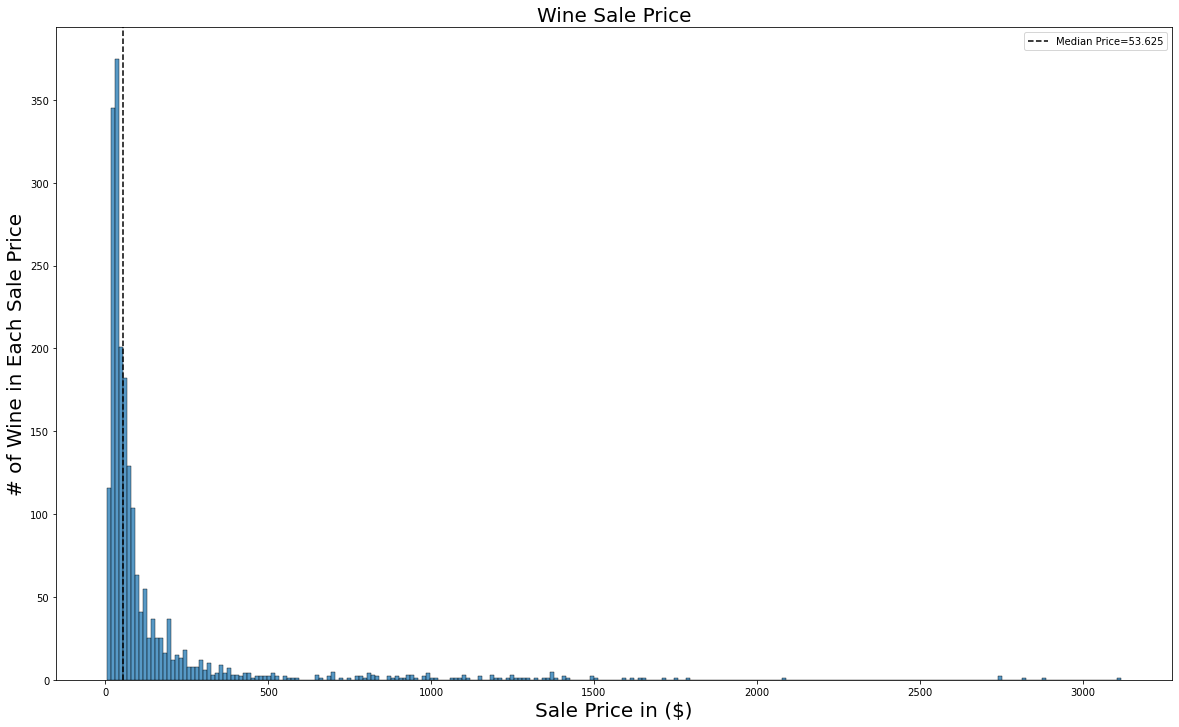

In [ ]:
#Visualization1: Use Histogram to look at the distribution of Price
fig, ax = plt.subplots(figsize=(20,12))
sns.histplot(data=df, x="price")
plt.xlabel('Sale Price in ($)', fontsize=20)
plt.ylabel('# of Wine in Each Sale Price', fontsize=20)
plt.title('Wine Sale Price', fontsize=20)
plt.axvline(df['price'].median(), color='black', linestyle='--', label=f"Median Price={df['price'].median()}")
plt.legend()   

From the shape of the price's histogram, I can see that a lot of the wine price is under about 200. Most of the wine price is under 500. There are few wine price is above 500 and fewer wine price is above 1000 or 1500.

count    2046.000000
mean      135.147856
std       272.228598
min         4.990000
25%        31.905982
50%        53.625000
75%       110.000000
max      3119.080000
Name: price, dtype: float64


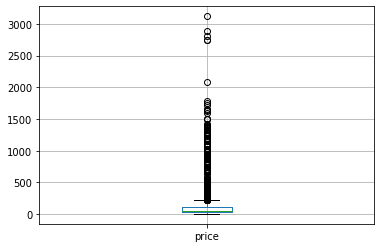

In [ ]:
#Visualization2: use boxplot to look if there is outliers in Price.
df.boxplot(column="price")
print(df["price"].describe())


According to the results of our df.describe() above:


1.   First Quartile (Q1) = 32
2.   Third Quartile (Q3) = 110
3.  Interquartile Range (IQR) = Q3 - Q1 = 78
4.   1.5 * IQR = 120
5. 'Minimum' (before outliers) is Q1 - 78 = -46
6. 'Maximum' (before outliers) is Q3 + 78 = 188

Notice below that the lower whisker is at 0, which is the actual minimum value (the plot does not cover non-existent values), and the upper whisker is at 188.

We can see there are lot of outliers above 188.

**Univariate Visuals for all features**


*   Cat_features:Winery, wine, region, type
*   num_features: rating, num_reviws, body, acidity, year



In [ ]:
df['region'].value_counts()

Ribera del Duero                   540
Rioja                              479
Priorato                           250
Toro                                82
Castilla y Leon                     51
                                  ... 
Ribera del Gallego-Cinco Villas      1
Monterrei                            1
Jerez Cream                          1
Condado de Huelva                    1
Abona                                1
Name: region, Length: 76, dtype: int64

In [ ]:
df1= df.loc[df['region']=='Ribera del Duero']
df2=df.loc[df['region']=='Priorato']
df3=df.loc[df['region']=='Toro']
df4=df.loc[df['region']=='Rioja']
df5=df.loc[df['region']=='Castilla y Leon']

In [ ]:
frames = [df1, df2, df3, df4, df5]

In [ ]:
df_top5 = pd.concat(frames)
display(df_top5)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Ribera del Duero,490.00,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Ribera del Duero,349.00,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1906,Quinta Sardonia,QS,2010,4.2,900,Castilla y Leon,40.76,Red,4.0,3.0
1924,Ossian,Vinas Viejas Verdejo,2015,4.2,769,Castilla y Leon,30.00,Verdejo,3.0,3.0
1932,Quinta Sardonia,QS,2007,4.2,707,Castilla y Leon,37.50,Red,4.0,3.0
1951,Bodegas Mauro,Red,2008,4.2,622,Castilla y Leon,55.00,Red,4.0,3.0


In [ ]:
df6=df["region"]!='Ribera del Duero'
df7=df['region']!='Priorato'
df8=df['region']!='Toro'
df9=df['region']!='Rioja'
df10=df['region']!='Castilla y Leon'

In [ ]:
df_other=df.loc[df6&df7&df8&df9&df10]
df_other

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50000,Tempranillo,4.0,2.0
14,Toro Albala,Don PX Convento Seleccion,1946,4.8,398,Montilla-Moriles,350.00000,Pedro Ximenez,5.0,1.0
18,Bodegas El Nido,El Nido,2018,4.8,217,Jumilla,195.62738,Red,4.0,3.0
20,Valdespino,Toneles Moscatel,N.V.,4.8,174,Jerez-Xeres-Sherry,253.00000,Sherry,4.0,3.0
23,Toro Albala,Don PX Convento Seleccion,1931,4.8,139,Montilla-Moriles,244.85000,Pedro Ximenez,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2030,Losada,Altos de Losada,2018,4.2,415,Bierzo,17.90000,Mencia,3.0,3.0
2031,Mar de Frades,Rias Baixas Albarino Finca Valinas,2015,4.2,414,Rias Baixas,16.78000,Albarino,3.0,3.0
2037,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Jerez-Xeres-Sherry,7.10000,Sherry,4.0,3.0
2042,Artadi,Valdegines,2016,4.2,398,Vino de Espana,48.96000,Tempranillo,4.0,2.0


**After exploring the data, I found that almost 70% wines are produced from these 5 regions. So, I will split the dataset into two sub datasets: top5 region dataset and other region dataset.**

**Use Histograms to look at the distribution of the cat_features in both df_top5 and df_other**

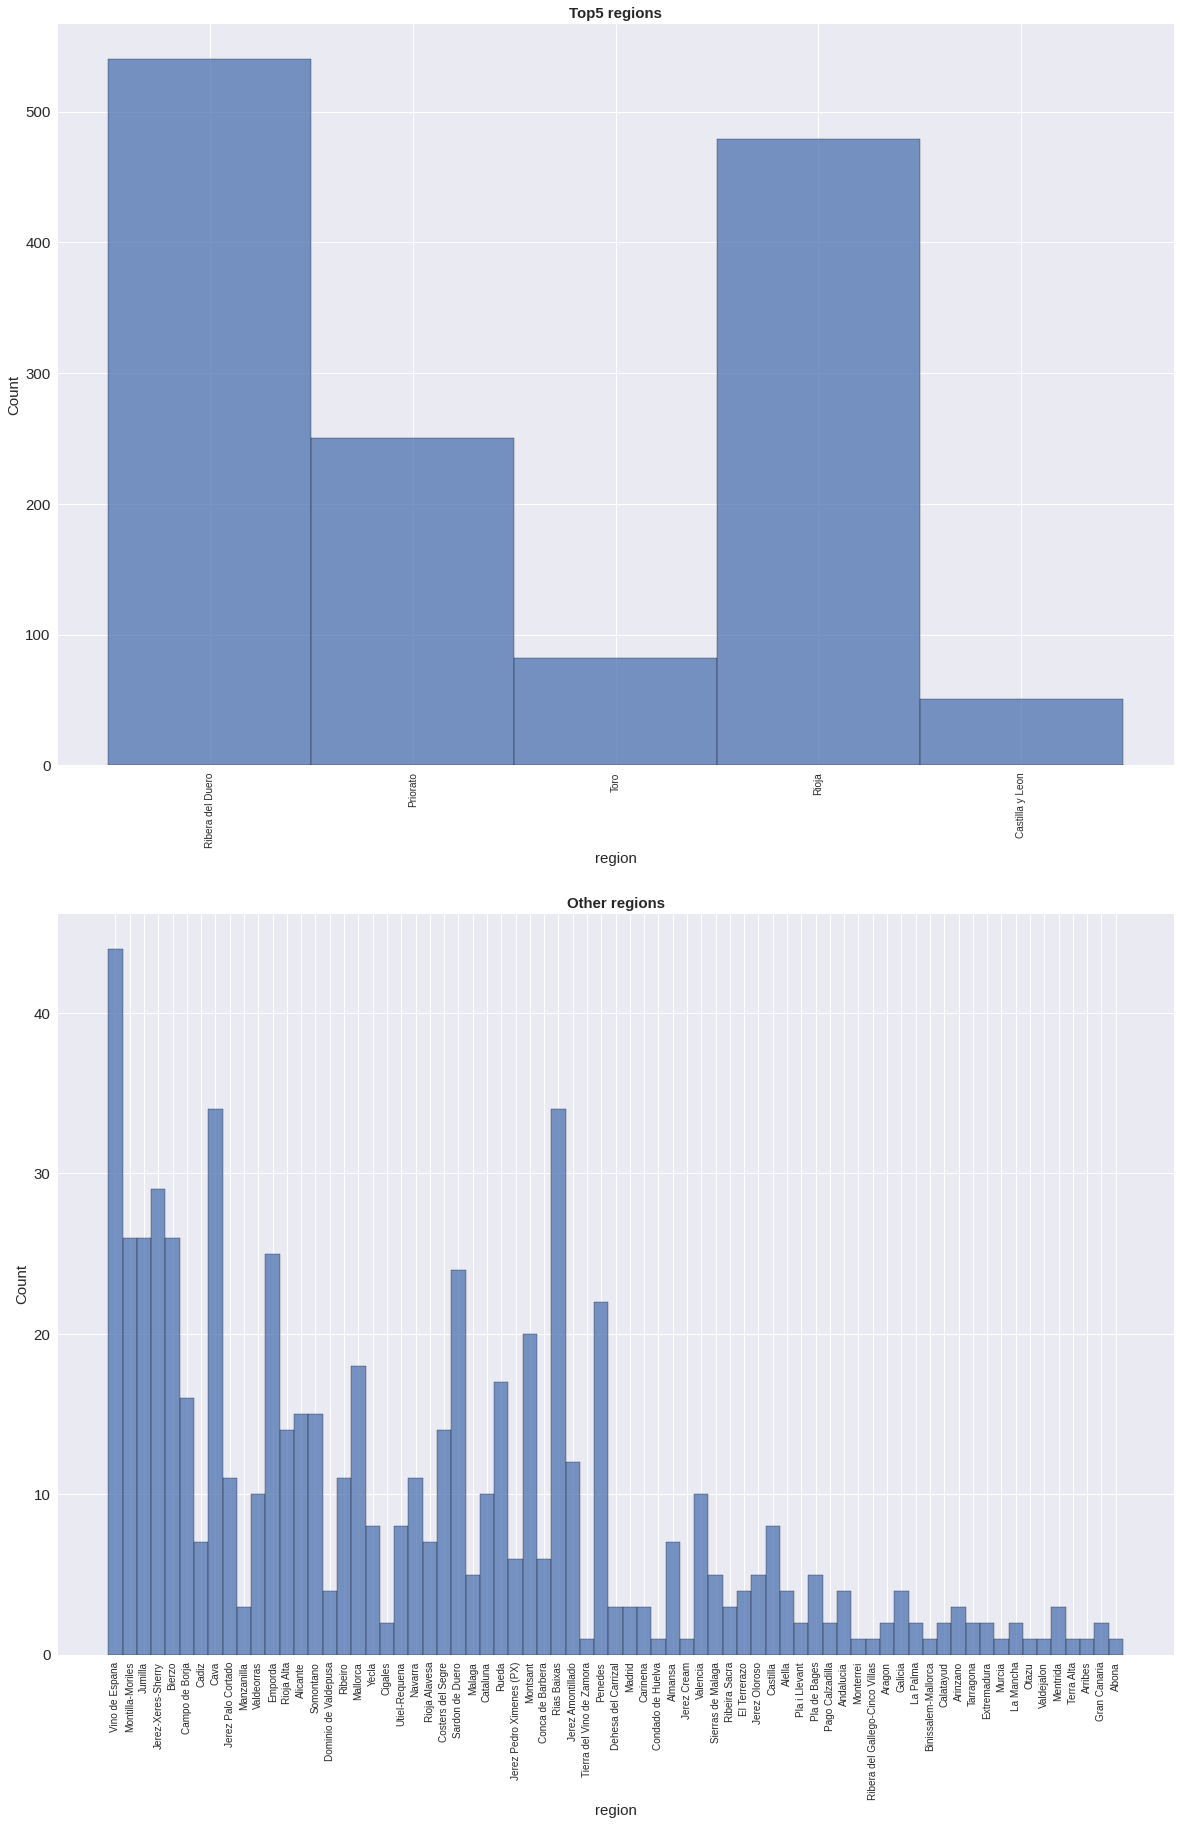

In [ ]:
#Visulizatioin 1: Histograms of top 5 regions and other regions
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=2, figsize=(20,30))
sns.histplot(data=df_top5, x="region", ax=axes[0])
axes[0].set_title('Top5 regions', fontsize=15, fontweight='bold')
axes[0].xaxis.get_label().set_fontsize(15)
axes[0].yaxis.get_label().set_fontsize(15)
axes[0].tick_params(axis="x", labelsize=10, rotation=90)
axes[0].tick_params(axis="y", labelsize=15)

sns.histplot(data=df_other, x="region", ax=axes[1])
axes[1].set_title('Other regions', fontsize=15, fontweight='bold')
axes[1].xaxis.get_label().set_fontsize(15)
axes[1].yaxis.get_label().set_fontsize(15)
axes[1].tick_params(axis="x", labelsize=10, rotation=90)
axes[1].tick_params(axis="y", labelsize=15)

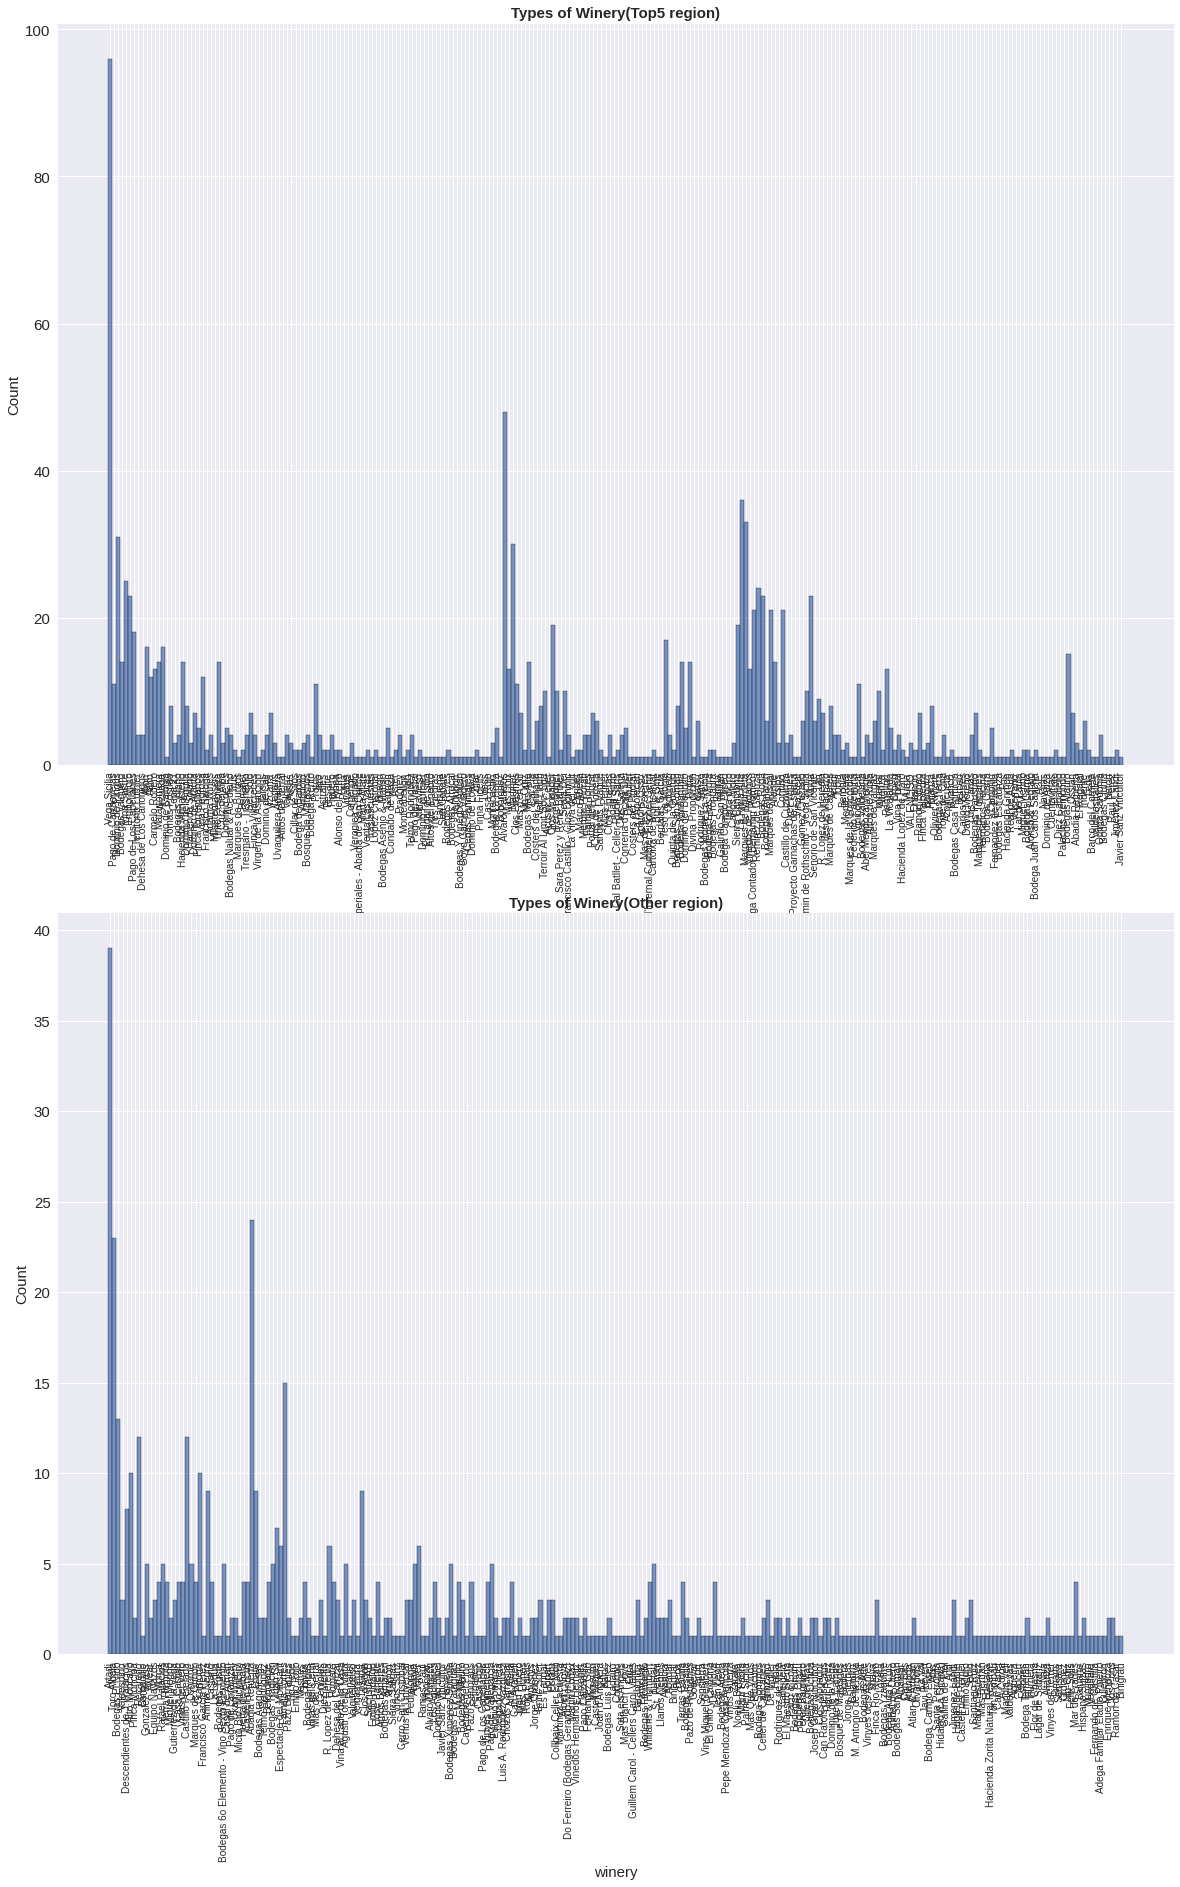

In [ ]:
#Visulizatioin 2: Histograms of top 5 regions' winery and other regions'winery
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=2, figsize=(20,30))
sns.histplot(data=df_top5, x="winery", ax=axes[0])
axes[0].set_title('Types of Winery(Top5 region)', fontsize=15, fontweight='bold')
axes[0].xaxis.get_label().set_fontsize(15)
axes[0].yaxis.get_label().set_fontsize(15)
axes[0].tick_params(axis="x", labelsize=10, rotation=90)
axes[0].tick_params(axis="y", labelsize=15)

sns.histplot(data=df_other, x="winery", ax=axes[1])
axes[1].set_title('Types of Winery(Other region)', fontsize=15, fontweight='bold')
axes[1].xaxis.get_label().set_fontsize(15)
axes[1].yaxis.get_label().set_fontsize(15)
axes[1].tick_params(axis="x", labelsize=10, rotation=90)
axes[1].tick_params(axis="y", labelsize=15)


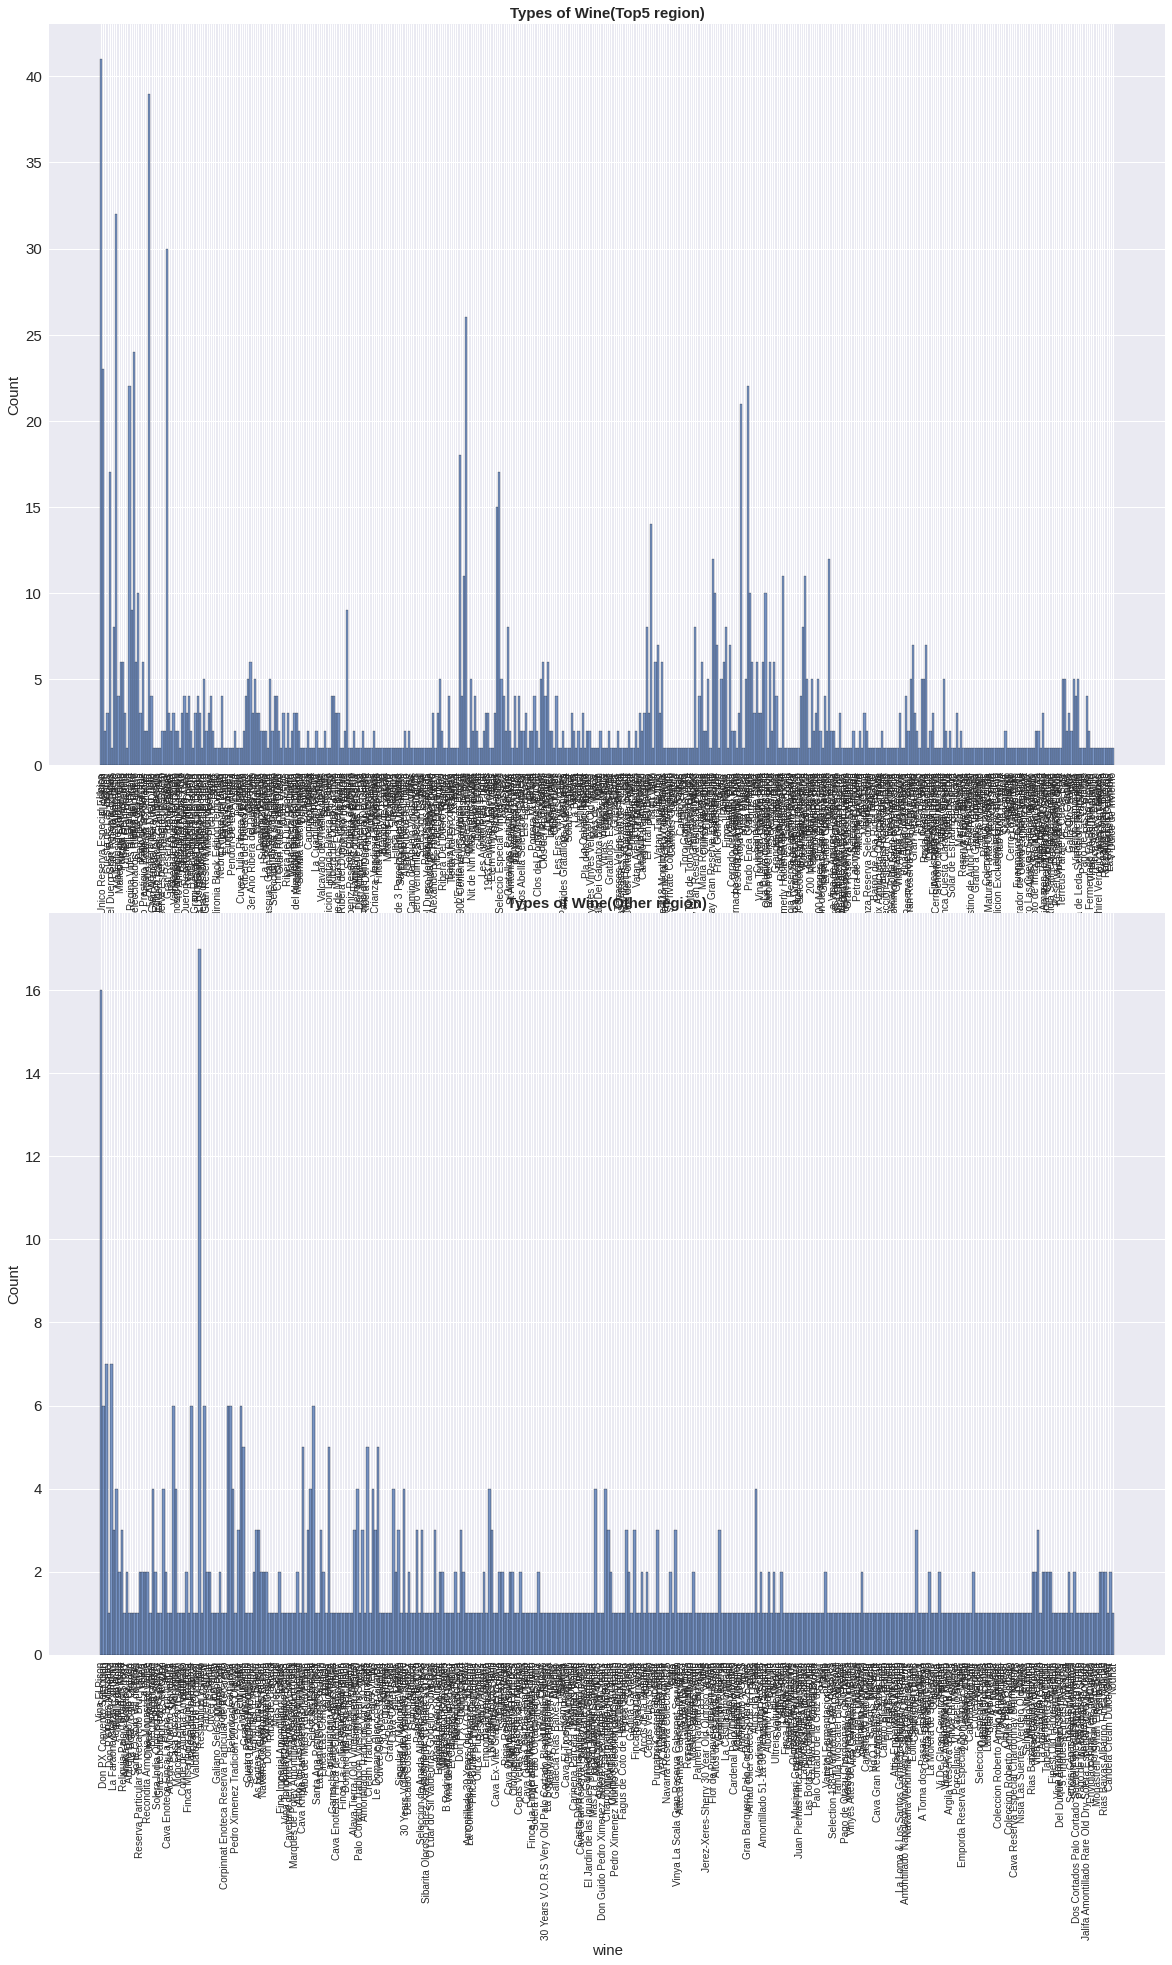

In [ ]:
#Visulizatioin 3: Histograms of top 5 regions' wine and other regions'wine
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=2, figsize=(20,30))
sns.histplot(data=df_top5, x="wine", ax=axes[0])
axes[0].set_title('Types of Wine(Top5 region)', fontsize=15, fontweight='bold')
axes[0].xaxis.get_label().set_fontsize(15)
axes[0].yaxis.get_label().set_fontsize(15)
axes[0].tick_params(axis="x", labelsize=10, rotation=90)
axes[0].tick_params(axis="y", labelsize=15)

sns.histplot(data=df_other, x="wine", ax=axes[1])
axes[1].set_title('Types of Wine(Other region)', fontsize=15, fontweight='bold')
axes[1].xaxis.get_label().set_fontsize(15)
axes[1].yaxis.get_label().set_fontsize(15)
axes[1].tick_params(axis="x", labelsize=10, rotation=90)
axes[1].tick_params(axis="y", labelsize=15)

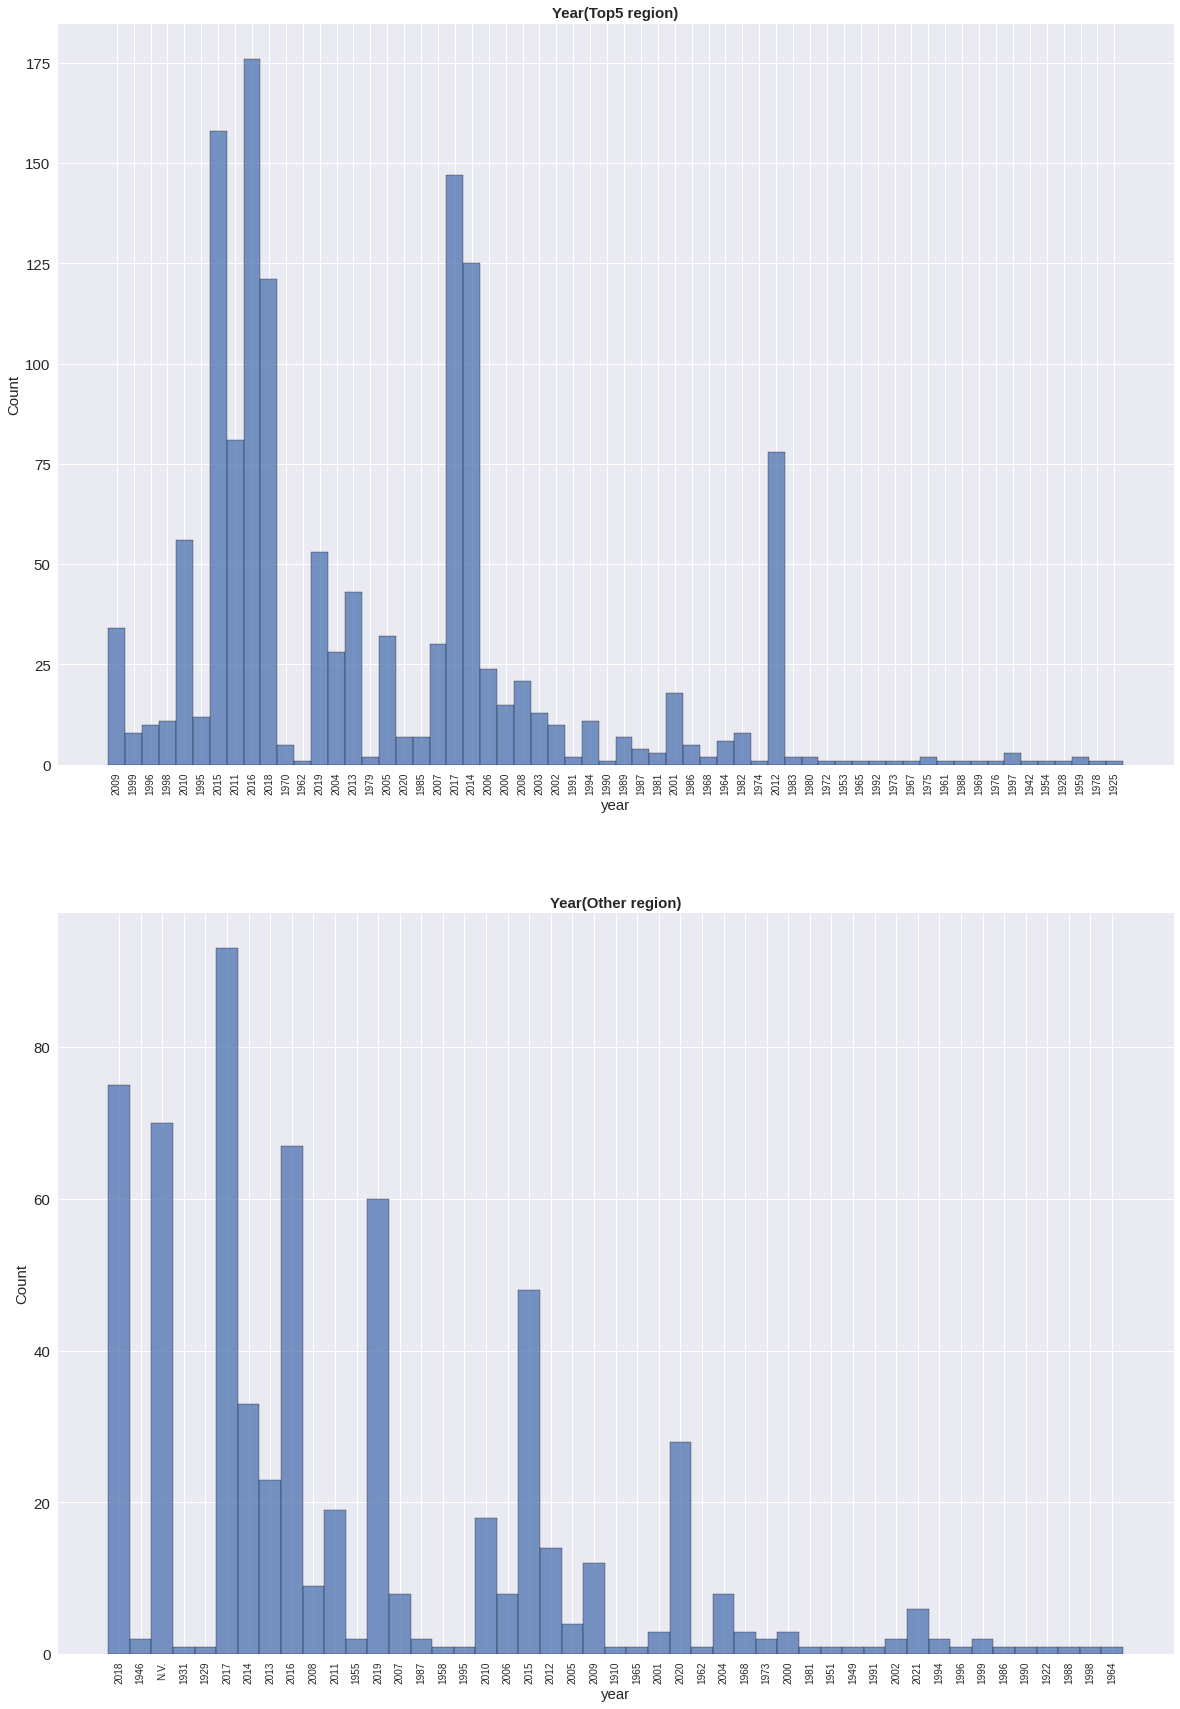

In [ ]:
#Visulizatioin 4: Histograms of top 5 regions' wines' made year and other regions'wines' made year
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=2, figsize=(20,30))
sns.histplot(data=df_top5, x="year", ax=axes[0])
axes[0].set_title('Year(Top5 region)', fontsize=15, fontweight='bold')
axes[0].xaxis.get_label().set_fontsize(15)
axes[0].yaxis.get_label().set_fontsize(15)
axes[0].tick_params(axis="x", labelsize=10, rotation=90)
axes[0].tick_params(axis="y", labelsize=15)

sns.histplot(data=df_other, x="year", ax=axes[1])
axes[1].set_title('Year(Other region)', fontsize=15, fontweight='bold')
axes[1].xaxis.get_label().set_fontsize(15)
axes[1].yaxis.get_label().set_fontsize(15)
axes[1].tick_params(axis="x", labelsize=10, rotation=90)
axes[1].tick_params(axis="y", labelsize=15)

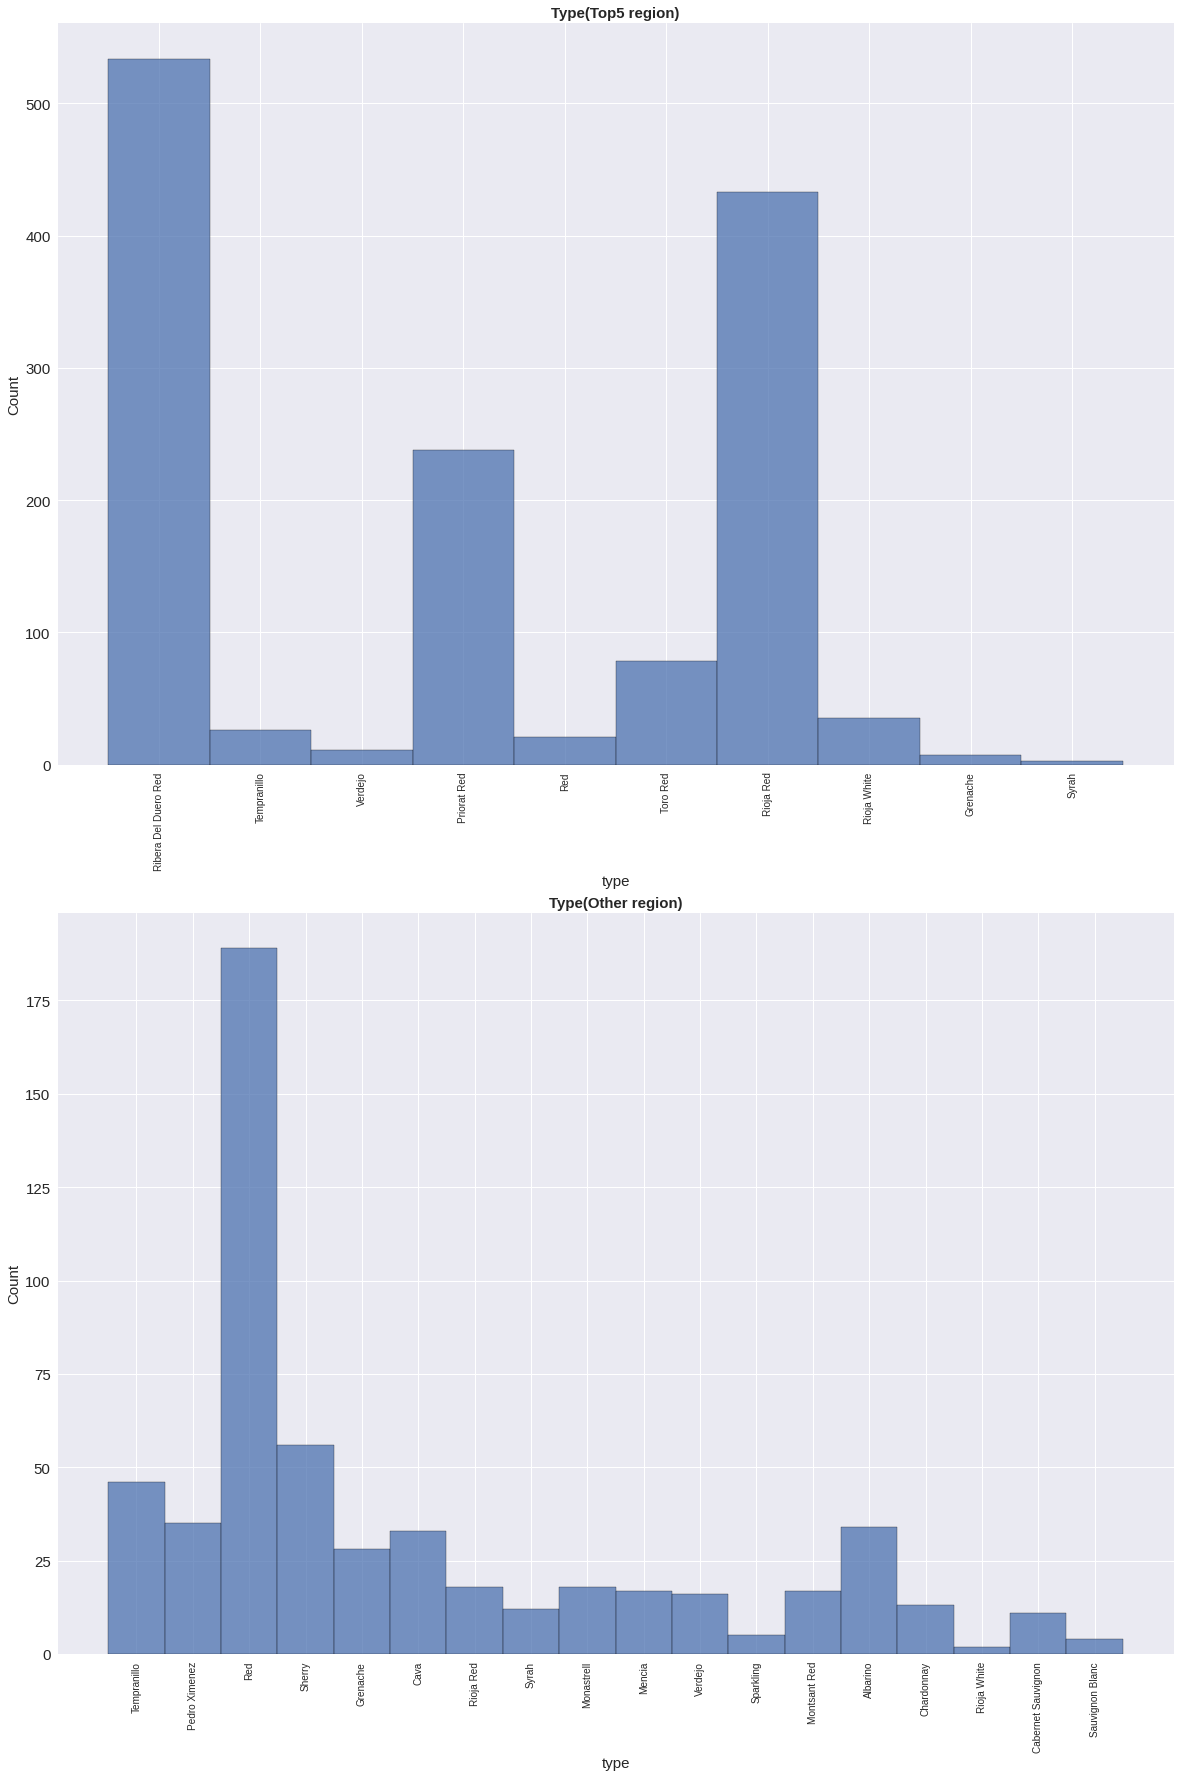

In [ ]:
#Visulizatioin 5: Histograms of top 5 regions' wine type and other regions'wine type
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=2, figsize=(20,30))
sns.histplot(data=df_top5, x="type", ax=axes[0])
axes[0].set_title('Type(Top5 region)', fontsize=15, fontweight='bold')
axes[0].xaxis.get_label().set_fontsize(15)
axes[0].yaxis.get_label().set_fontsize(15)
axes[0].tick_params(axis="x", labelsize=10, rotation=90)
axes[0].tick_params(axis="y", labelsize=15)

sns.histplot(data=df_other, x="type", ax=axes[1])
axes[1].set_title('Type(Other region)', fontsize=15, fontweight='bold')
axes[1].xaxis.get_label().set_fontsize(15)
axes[1].yaxis.get_label().set_fontsize(15)
axes[1].tick_params(axis="x", labelsize=10, rotation=90)
axes[1].tick_params(axis="y", labelsize=15)

**Use boxplots to look if there are outliers in num_features and group by type.**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

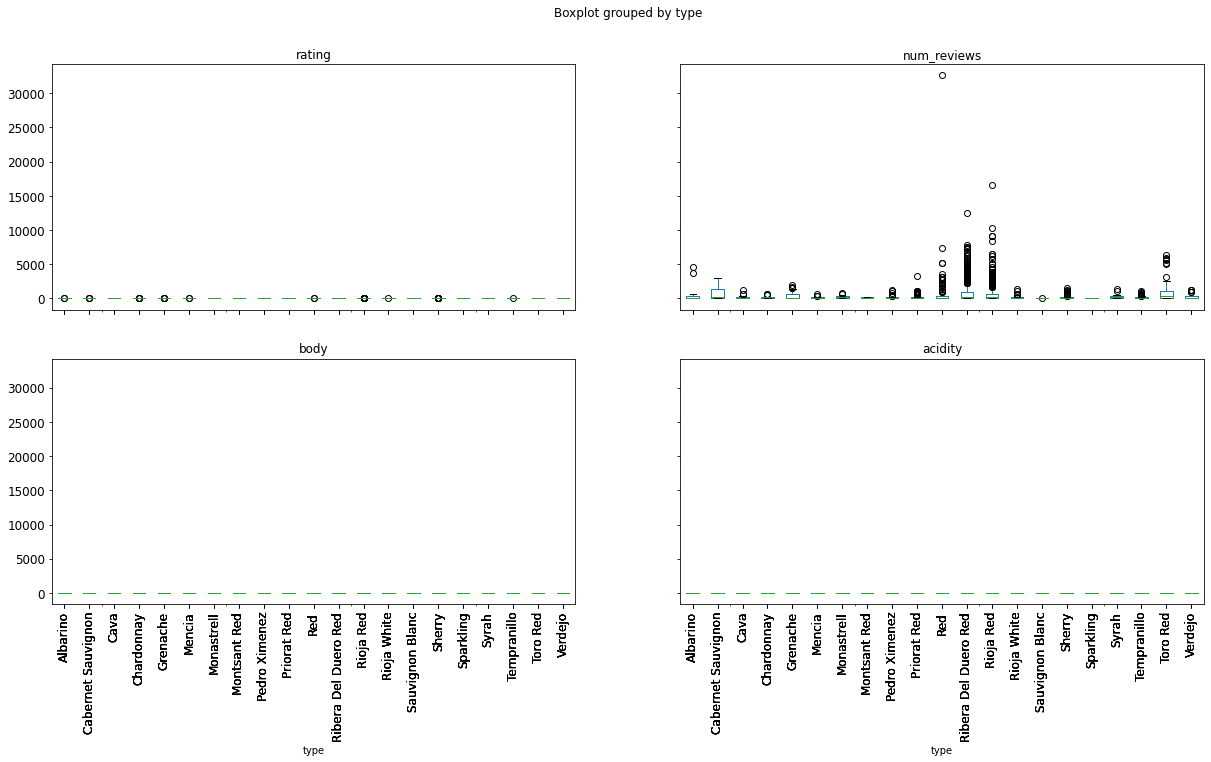

In [ ]:
df.boxplot(["rating", "num_reviews", "body", "acidity"], by = "type", figsize = (20,10), fontsize = 12, rot=90, grid=False)
plt.show()

From the above boxplots I can see that only num_reviews has some outliers in some wine types.